# What is RFM?
RFM analysis is a marketing technique used to quantitatively rank and group customers based on the ***recency, frequency and monetary*** total of their recent transactions to identify the best customers and perform targeted marketing campaigns.
* Recency, frequency, monetary value (RFM) is a marketing analysis tool used to identify a firm's best clients based on the nature of their spending habits.
* An RFM analysis evaluates clients and customers by scoring them in three categories: how recently they've made a purchase, how often they buy, and the size of their purchases.
* RFM analysis helps firms reasonably predict which customers are likely to purchase their products again, how much revenue comes from new (versus repeat) clients, and how to turn occasional buyers into habitual ones.

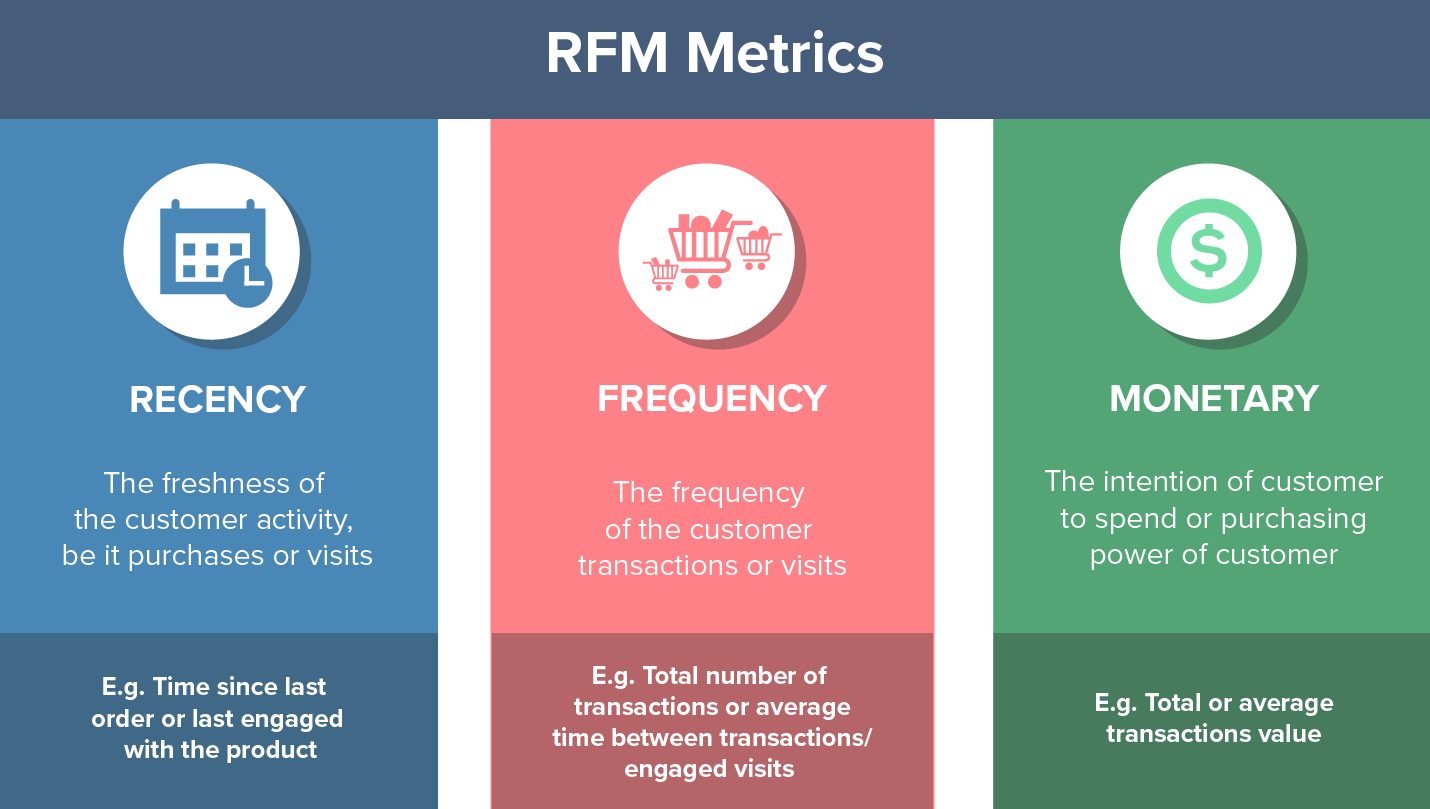

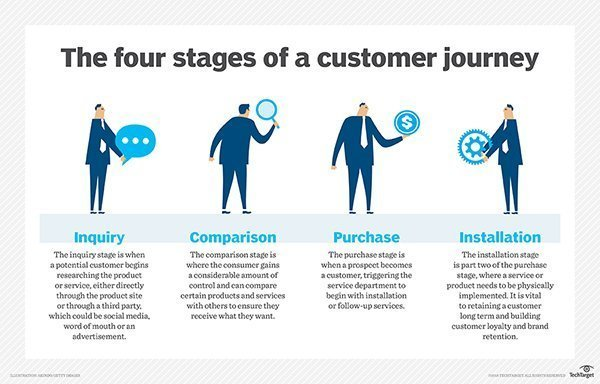

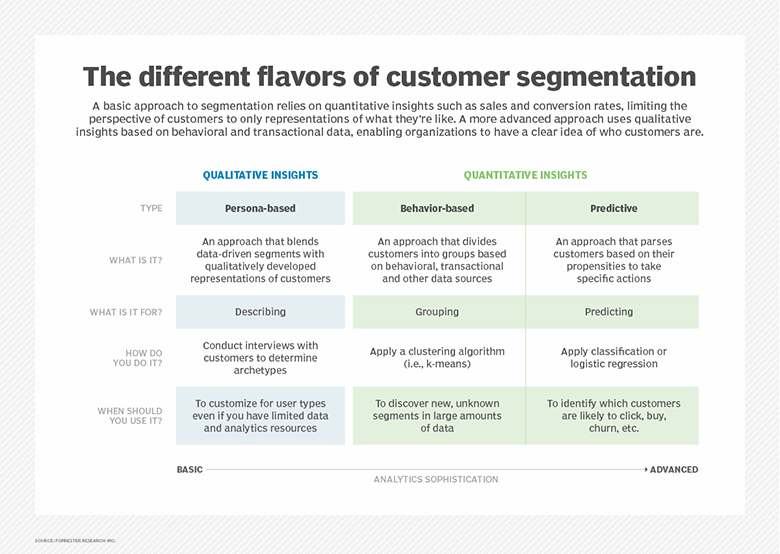

In [1]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 923 kB/s            


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime

In [3]:
%%time
df= pd.read_excel('../input/online-retail-for-market-basket-analysis/Online Retail.xlsx')
df

CPU times: user 1min 30s, sys: 515 ms, total: 1min 31s
Wall time: 1min 32s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
### Create a revenue column
df['Revenue'] = df['Quantity']* df['UnitPrice']
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
217247,555923,22088,PAPER BUNTING COLOURED LACE,1,2011-06-07 17:09:00,5.79,NaN,United Kingdom,5.79
534874,581174,21181,PLEASE ONE PERSON METAL SIGN,12,2011-12-07 15:08:00,2.10,13769.0,United Kingdom,25.20
14217,537466,21488,NaN,-50,2010-12-07 10:33:00,0.00,NaN,United Kingdom,-0.00
364318,568657,22950,36 DOILIES VINTAGE CHRISTMAS,1,2011-09-28 12:22:00,1.45,16460.0,United Kingdom,1.45
60698,541422,22960,JAM MAKING SET WITH JARS,1,2011-01-17 17:48:00,8.29,NaN,United Kingdom,8.29


# Recency
The more recently a customer has made a purchase with a company, the more likely they will continue to keep the business and brand in mind for subsequent purchases. Compared with customers who have not bought from the business in months or even longer periods, the likelihood of engaging in future transactions with recent customers is arguably higher.

Such information can be used to get recent customers to revisit the business and spend more. In an effort not to overlook lapsed customers, marketing efforts might be made to remind them that it's been a while since their last transaction, while offering them an incentive to resume buying.

In [5]:
### Now calculating Recency
### Recency is AMOUNT OF TIME SINCE THE PERSON HAS DONE THE LAST TRANSACTION.
# We will need invoice date

# But 1st convert invoice date to datatime from object
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, infer_datetime_format = True)

### Now add a date column
df['Date'] = df.InvoiceDate.dt.date

# Now setting todays date, but since this is static data 
# we will set todays = max date of df + 1 day
TodayDate = max(df['Date']) + datetime.timedelta(days=1)

### ~~~~~~~~~~~~ Now create a column for Recency ~~~~~~~~~~~~ ###
df['Recency'] = TodayDate - df['Date']
## Now lets check the dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Date,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,374 days
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,374 days
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,374 days
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,374 days
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,374 days


In [6]:
### Now we will be grouping the dataframe based on CustomerID
df_rfm = df.groupby('CustomerID').agg({ 'InvoiceNo': 'count',
                                      'Revenue': 'sum',
                                      'Recency': 'min'})

In [7]:
df_rfm.head(2)

,InvoiceNo,Revenue,Recency
CustomerID,,,
12346.0,2,0.0,326 days
12347.0,182,4310.0,3 days


# Frequency
The frequency of a customer’s transactions may be affected by factors such as the type of product, the price point for the purchase, and the need for replenishment or replacement. If the purchase cycle can be predicted — for example when a customer needs to buy more groceries — marketing efforts may be directed towards reminding them to visit the business when staple items run low.

# Monetary Value or Revenue
Monetary value stems from how much the customer spends. A natural inclination is to put more emphasis on encouraging customers who spend the most money to continue to do so. While this can produce a better return on investment in marketing and customer service, it also runs the risk of alienating customers who have been consistent but may not spend as much with each transaction.

`Note:` Nonprofit organizations, in particular, have relied on RFM analysis to target donors, as people who have been the source of contributions in the past are likely to make additional gifts.

In [8]:
# WE can rename InvoiceNo to frequency which is standard
# we can also change revenue to monetory value as RFM = Recency Frequency Monetary Value

df_rfm = pd.DataFrame.rename(df_rfm, columns = {'InvoiceNo': 'Frequency'})
df_rfm.sample(8)

,Frequency,Revenue,Recency
CustomerID,,,
15203.0,142,1827.80,26 days
12647.0,128,3669.92,23 days
14513.0,18,438.49,101 days
16650.0,24,518.42,72 days
16746.0,452,6694.31,5 days
13142.0,23,307.09,20 days
15791.0,76,1604.44,44 days
14077.0,42,499.42,41 days


In [9]:
# Lets also remove days from recency 
df_rfm['Recency'] = df_rfm['Recency'].astype('timedelta64[D]') ## This code will remove days from recency and will convert it to float

In [10]:
###  Now creating Quartile Distribution for REVENUE , FREQUENCY and RECENCY
## will use qcut to distribute the dataframe into quartiles

# For recency 
# Reason for decending order becz I want to rank least Recency as 4 and most Recency with 1. 
## As I want to value people with least recency more than some1 who brought sometimes ago. Thus weighing more to latest customers.
df_rfm['Recency_Quartiles']= pd.qcut(df_rfm['Recency'], q=4, labels = [4,3,2,1])

# Quartile distribution for Revenue
df_rfm['Revenue_Quartiles']= pd.qcut(df_rfm['Revenue'], q=4, labels = [1,2,3,4]) # More revenue more weightage

# Quartile distribution for Frequency
df_rfm['Frequency_Quartiles']= pd.qcut(df_rfm['Frequency'], q=4, labels = [1,2,3,4]) # # More Frequency more weightage

In [11]:
df_rfm.head()

,Frequency,Revenue,Recency,Recency_Quartiles,Revenue_Quartiles,Frequency_Quartiles
CustomerID,,,,,,
12346.0,2,0.00,326.0,1,1,1
12347.0,182,4310.00,3.0,4,4,4
12348.0,31,1797.24,76.0,2,4,2
12349.0,73,1757.55,19.0,3,4,3
12350.0,17,334.40,311.0,1,2,1


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations:</u></b>
 
* <i> Now we can observe higher the revenue higher is the quartile value u can observe this for `CustomerID 12347`.</i>
* <i> For `CustomerID 12347` we can also see he recently brought product `3 days back` thus `having high recency_quartile` which is 4.</i>
* <i> We can see `CustomerID 12347` also have quite high `frequency 182` thus his `Frequency_quartile he is ranked 4`.</i>
* <i> Similarly we can see `CustomerID 12346` has a `revenue of 0.00`, `frequency of 2` and `recency of 326` thus he is `ranked lowest on respective quartiles`, Implimenting successful implimentation of code. </i>  

In [12]:
### These quartiles are stored as category
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Frequency            4372 non-null   int64   
 1   Revenue              4372 non-null   float64 
 2   Recency              4372 non-null   float64 
 3   Recency_Quartiles    4372 non-null   category
 4   Revenue_Quartiles    4372 non-null   category
 5   Frequency_Quartiles  4372 non-null   category
dtypes: category(3), float64(2), int64(1)
memory usage: 150.0 KB


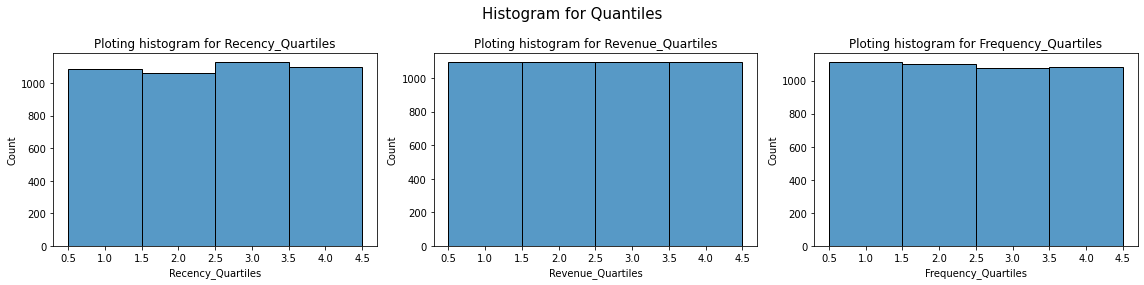

In [13]:
### Lets quickly plot these values on scatterplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.histplot(df_rfm['Recency_Quartiles'])
plt.title('Ploting histogram for Recency_Quartiles', fontsize=12)
plt.subplot(1,3,2)
sns.histplot(df_rfm['Revenue_Quartiles'])
plt.title('Ploting histogram for Revenue_Quartiles', fontsize=12)
plt.subplot(1,3,3)
sns.histplot(df_rfm['Frequency_Quartiles'])
plt.title('Ploting histogram for Frequency_Quartiles', fontsize=12)
plt.suptitle('Histogram for Quantiles', fontsize=15)
plt.tight_layout();

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📝 &nbsp;<b><u>Do You Know why distribution seems uniform?:</u></b>
 
* <i>Because these are Quartiles distribution.</i>
* <i> Data is not uniformly distributed as u can see in below plot.<i>


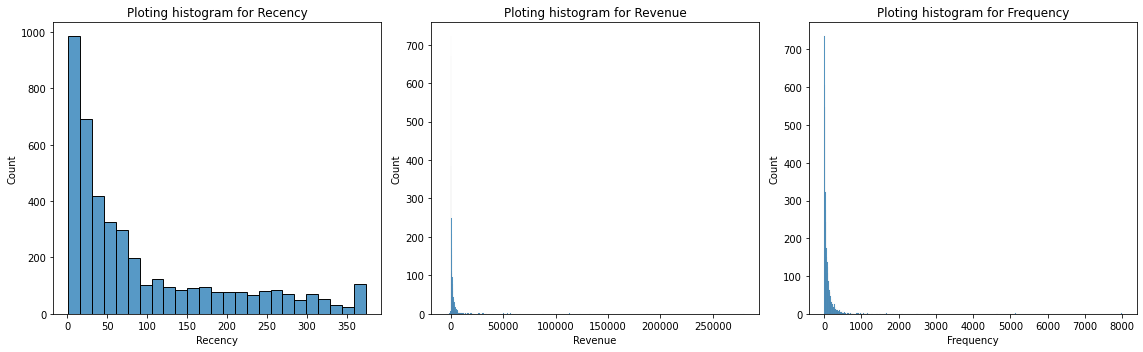

In [14]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.histplot(df_rfm['Recency'])
plt.title('Ploting histogram for Recency', fontsize=12)
plt.subplot(1,3,2)
sns.histplot(df_rfm['Revenue'])
plt.title('Ploting histogram for Revenue', fontsize=12)
plt.subplot(1,3,3)
sns.histplot(df_rfm['Frequency'])
plt.title('Ploting histogram for Frequency', fontsize=12)
plt.tight_layout();

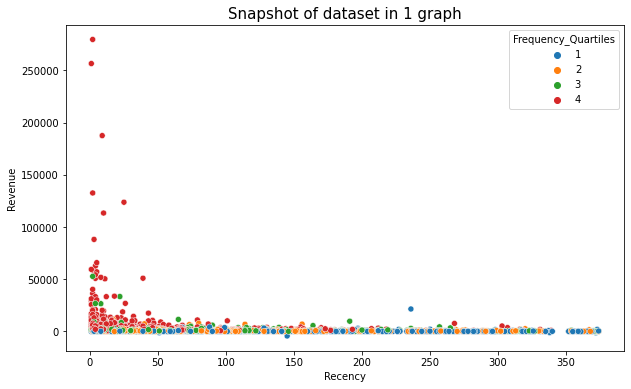

In [15]:
### Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Recency', y='Revenue', hue= 'Frequency_Quartiles', data=df_rfm)
plt.title('Snapshot of dataset in 1 graph',fontsize=15);

In [16]:
## Now lets conver these Quartiles to int from category

df_rfm['Recency_Quartiles']   = df_rfm['Recency_Quartiles'].astype(int)
df_rfm['Revenue_Quartiles']   = df_rfm['Revenue_Quartiles'].astype(int)
df_rfm['Frequency_Quartiles'] = df_rfm['Frequency_Quartiles'].astype(int)

In [17]:
## So why did we convert these to int?
#### To add these quartiles 
df_rfm['Total_Score'] = df_rfm['Frequency_Quartiles'] + df_rfm['Revenue_Quartiles'] + df_rfm['Recency_Quartiles']

In [18]:
### To check df for execution of our code
df_rfm.sample(3)

,Frequency,Revenue,Recency,Recency_Quartiles,Revenue_Quartiles,Frequency_Quartiles,Total_Score
CustomerID,,,,,,,
17503.0,38,558.96,3.0,4,2,2,8
15584.0,125,722.61,24.0,3,3,4,10
13117.0,76,984.91,22.0,3,3,3,9


In [19]:
df_rfm.groupby('Total_Score').mean()

,Frequency,Revenue,Recency,Recency_Quartiles,Revenue_Quartiles,Frequency_Quartiles
Total_Score,,,,,,
3,7.841432,109.124936,265.608696,1.000000,1.000000,1.000000
4,13.935897,227.029359,175.615385,1.461538,1.264103,1.274359
5,21.059615,343.824560,152.723077,1.748077,1.630769,1.621154
6,28.566524,491.686762,95.092275,2.278970,1.854077,1.866953
7,39.501119,725.411834,79.451902,2.402685,2.369128,2.228188
8,57.079399,972.265794,63.032189,2.654506,2.686695,2.658798
9,78.846890,1361.887038,44.650718,2.916268,3.055024,3.028708
10,115.324943,1897.634760,32.009153,3.178490,3.384439,3.437071
11,199.894459,3993.548654,21.094987,3.416887,3.786280,3.796834


In [20]:
df_rfm.Total_score.hist(edgecolor='Black', linewidth=1.3)
plt.grid(False)
plt.title("Histogram for Total_score to check it's distribution");

AttributeError: 'DataFrame' object has no attribute 'Total_score'

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.scatterplot(x='Recency', y='Revenue', hue= 'Total_score', data=df_rfm)
plt.title('Scatterplot Recency vs Revenue',fontsize=12)
plt.subplot(1,3,2)
sns.scatterplot(x='Recency', y='Frequency', hue= 'Total_score', data=df_rfm)
plt.title('Scatterplot Recency vs Frequency',fontsize=12)
plt.subplot(1,3,3)
sns.scatterplot(x='Revenue', y='Frequency', hue= 'Total_score', data=df_rfm)
plt.title('Scatterplot Revenue vs Frequency',fontsize=12)
plt.suptitle('Ploting Scatterplot for different pair of columns',fontsize=16)
plt.tight_layout();

In [ ]:
### WE can also try plotting all info in a single scatterplot 
plt.figure(figsize=(18,10))
sns.scatterplot(x='Recency', y='Revenue', hue= 'Frequency_Quartiles' ,size= 'Total_score',sizes=(40, 400), alpha=.5, palette="muted", data=df_rfm)
plt.title('Customer Segmentation', fontsize=18);

one more intresting info graph

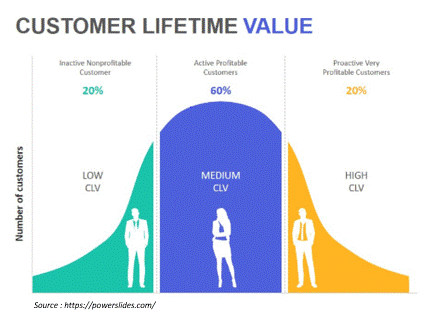

# <p style="background-color:#73d1ff;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">🙏 Thank You</p>